In [1]:
%matplotlib inline
import datasets

/u/ki/mbaumer/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
dset = datasets.BaseDataset('/nfs/slac/des/fs1/g/sims/mbaumer/3pt_sims/new/redmagicHD/buzzard-v1.1-y1a1-full_run_redmapper_v6.4.13_redmagic_highdens_0.5-10.fit',
                     '/nfs/slac/des/fs1/g/sims/mbaumer/3pt_sims/new/redmagicHD/buzzard-v1.1-y1a1-full_run_redmapper_v6.4.13_redmagic_highdens_0.5-10_vlim_zmask.fit')

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT


/u/ki/mbaumer/anaconda/lib/python2.7/site-packages/healpy/fitsfunc.py:315: UserWarning: No ORDERING keyword in header file : assume RING
  "assume %s"%ordering)
/u/ki/mbaumer/anaconda/lib/python2.7/site-packages/healpy/fitsfunc.py:343: UserWarning: No INDXSCHM keyword in header file : assume EXPLICIT
  "assume {}".format(schm))


NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT


In [3]:
type(dset) is datasets.BaseDataset

True

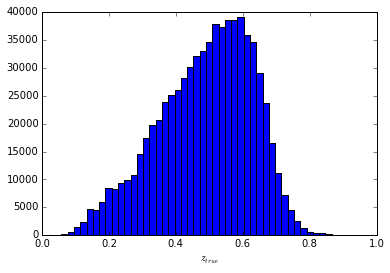

In [4]:
dset.plot_n_z()

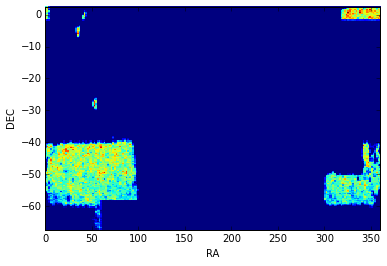

In [5]:
dset.make_sky_map()

In [6]:
dset.apply_footprint(0,90,-60,-40)

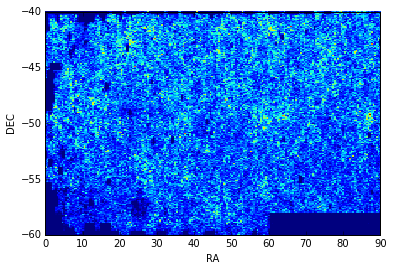

In [7]:
dset.make_sky_map()

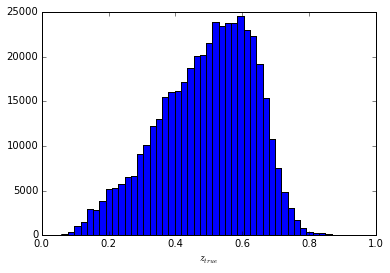

In [8]:
dset.plot_n_z()

In [9]:
dset.apply_z_cut(.2,.3)

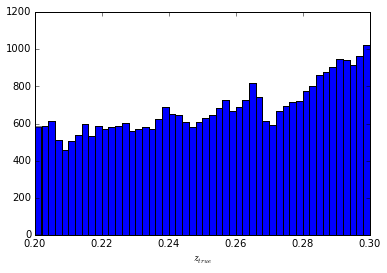

In [10]:
dset.plot_n_z()

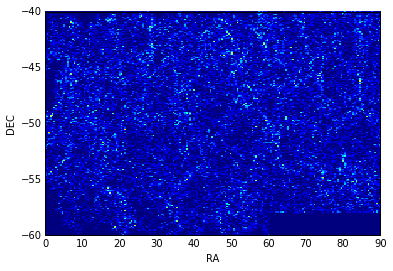

In [11]:
dset.make_sky_map()

In [12]:
dset.pixelize_at_target_nside(1024)

nbar is 0.114469508572 galaxies per pixel


In [13]:
dset.compute_new_jk_regions()

In [14]:
dset.jk_labels

array([18, 18, 18, ..., 10, 10, 10], dtype=int32)

/u/ki/mbaumer/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


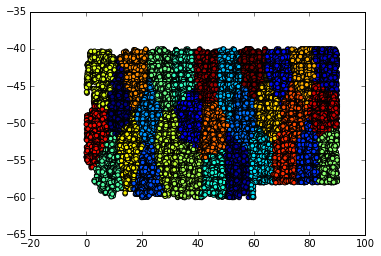

In [15]:
import matplotlib.pyplot as plt
plt.scatter(dset.data['RA'],dset.data['DEC'],c=dset.jk_labels)

In [37]:
dset.__dict__

{'jk_labels': array([18, 18, 18, ..., 10, 10, 10], dtype=int32),
 'max_z': 0.3,
 'min_z': 0.2,
 'n_jackknife': 30,
 'nbar': 0.11446950857196331,
 'nside': 1024,
 'pixelized': (array([ 17.13867188,  17.2265625 ,  17.31445312, ...,  57.80769231,
          58.77692308,  59.05384615]),
  array([-40.08176917, -40.08176917, -40.08176917, ..., -59.9616871 ,
         -59.9616871 , -59.9616871 ]),
  array([ 0.,  0.,  0., ...,  0.,  0.,  0.])),
 'zvar': 'ZSPEC'}

In [21]:
out.keys()

['jk_labels',
 'nside',
 'min_z',
 'pixelized',
 'max_z',
 'mask',
 'zvar',
 'zmask',
 'n_jackknife',
 'data',
 'nbar']

In [22]:
from sys import getsizeof

In [30]:
del out['mask']
del out['zmask']

In [33]:
del out['data']

In [34]:
out.keys()

['jk_labels',
 'nside',
 'min_z',
 'pixelized',
 'max_z',
 'zvar',
 'n_jackknife',
 'nbar']

In [36]:
import cPickle as pickle
with open('test.pkl', 'wb') as pickle_file:
            pickle.dump(out, pickle_file,protocol=2)

(array([  8.55490000e+04,   8.38400000e+03,   9.41000000e+02,
          1.61000000e+02,   0.00000000e+00,   2.50000000e+01,
          5.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ]),
 <a list of 10 Patch objects>)

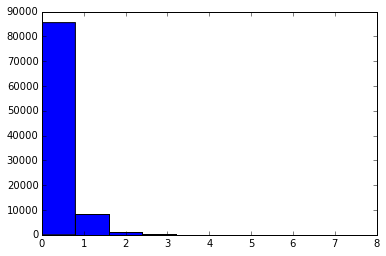

In [40]:
plt.hist(dset.pixelized[2])